<a href="https://colab.research.google.com/github/Swati-Subhadarshini/UWFinTech_Project-2/blob/main/HousePricePredicting_ModelSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kings County Housing Price Prediction

The goal of this statistical analysis is to help us understand the relationship between house features and how these variables are used to predict house price.

Objective Predict the house price Using two different models in terms of minimizing the difference between predicted and actual rating Data used: Kaggle-kc_house Dataset

Instructions:

This project consists of the following subsections:

Split the Data into Training and Testing Sets

Create a Logistic Regression Model with the Original Data

Predict a Logistic Regression Model with Resampled Training Data

Split the Data into Training and Testing Sets Open the starter code notebook and then use it to complete the following steps.

Read the lending_data.csv data from the Resources folder into a Pandas DataFrame.

Create the labels set (y) from the “loan_status” column, and then create the features (X) DataFrame from the remaining columns.

Note A value of 0 in the “loan_status” column means that the loan is healthy. A value of 1 means that the loan has a high risk of defaulting.

Check the balance of the labels variable (y) by using the value_counts function.

Split the data into training and testing datasets by using train_test_split.

Create a Logistic Regression Model with the Original Data Employ your knowledge of logistic regression to complete the following steps:

Fit a logistic regression model by using the training data (X_train and y_train).

Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.

Evaluate the model’s performance by doing the following:

Calculate the accuracy score of the model.

Generate a confusion matrix.

Print the classification report.

Answer the following question: How well does the multiple regression model predict the price of houses in Kings county?

A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.



In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from datetime import datetime

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [1]:
from google.colab import files

csv_file = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


**Model 1- Multiple Regression**

In [5]:
#Read the csv file into the dataframe.
kc_house_df = pd.read_csv("kc_house_data.csv")

#Review the dataframe
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Get some information about out Data-set
kc_house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

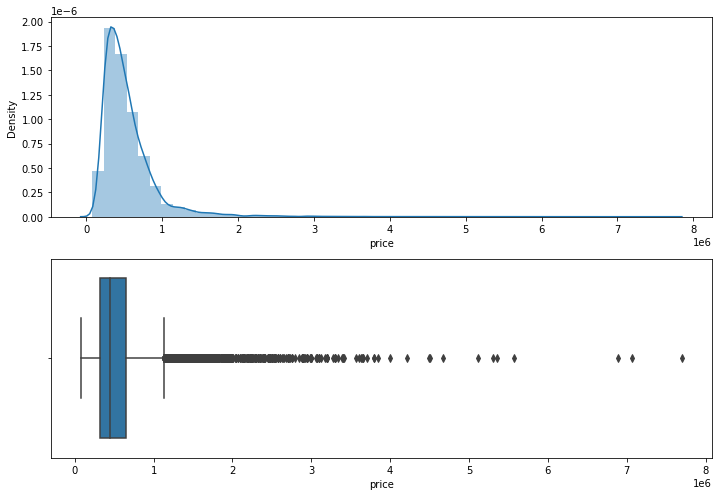

In [7]:
#Let’s plot couple of featureto get a better feel of the date
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(kc_house_df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(kc_house_df['price'])
plt.tight_layout()

Observation: With distribution plot of price, we can visualize that most of the prices are between 0 and around 1M with few outliers close to 8 million. It would make sense to drop those outliers in our analysis.

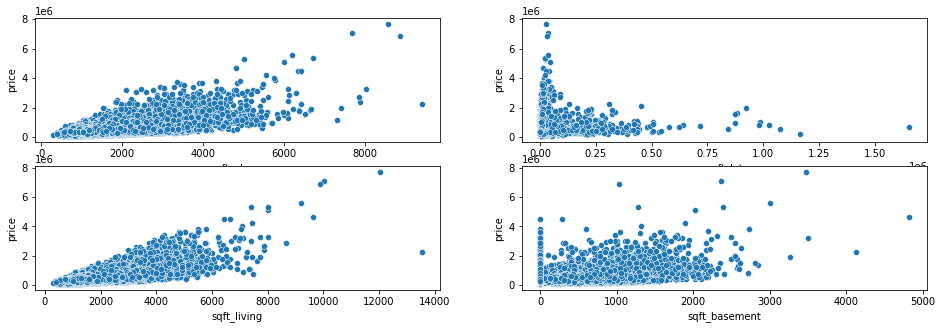

In [8]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(kc_house_df['sqft_above'], kc_house_df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(kc_house_df['sqft_lot'],kc_house_df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(kc_house_df['sqft_living'],kc_house_df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(kc_house_df['sqft_basement'],kc_house_df['price'])

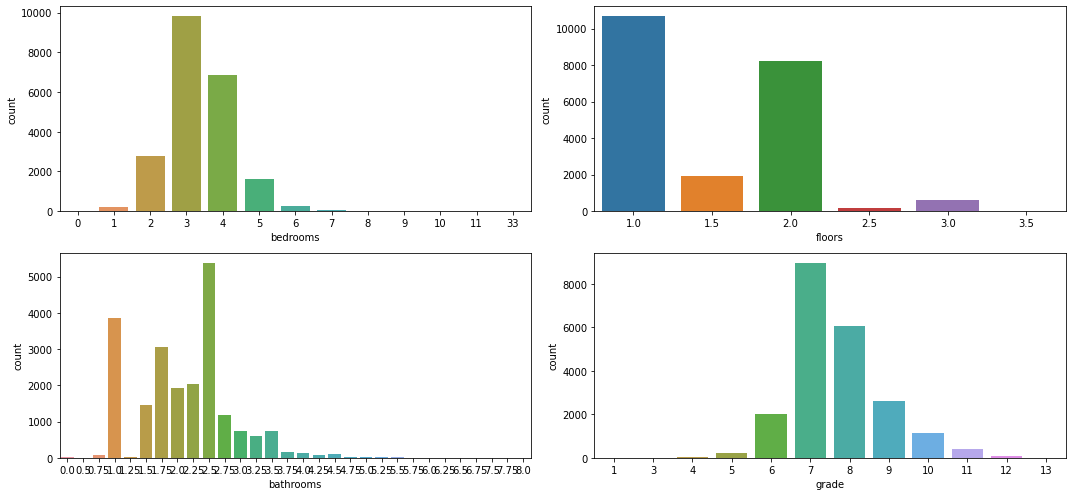

In [9]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(kc_house_df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(kc_house_df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(kc_house_df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(kc_house_df['grade'])
plt.tight_layout()

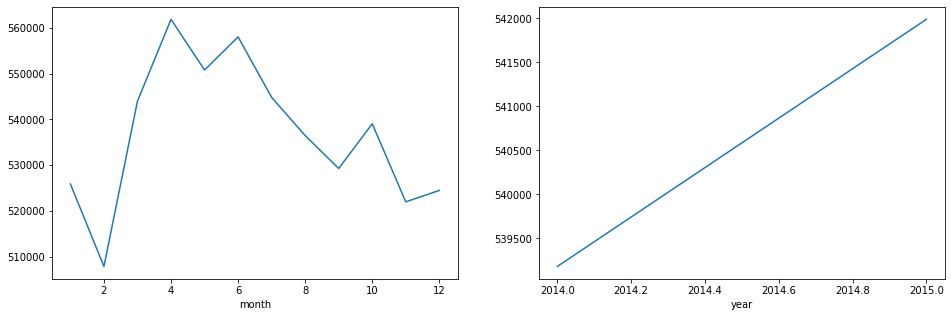

In [10]:
#let's break date to years, months
kc_house_df['date'] = pd.to_datetime(kc_house_df['date'])
kc_house_df['month'] = kc_house_df['date'].apply(lambda date:date.month)
kc_house_df['year'] = kc_house_df['date'].apply(lambda date:date.year)
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
kc_house_df.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
kc_house_df.groupby('year').mean()['price'].plot()

In [11]:
# check if there are any Null values
kc_house_df.isnull().sum()
# drop some unnecessary columns
kc_house_df = kc_house_df.drop(columns=['date', 'id', 'zipcode'], axis=1)
kc_house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [12]:
kc_house_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

Step 2: Dataset Preparation (Splitting and Scaling) Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set. Features (X): The columns that are inserted into our model will be used to make predictions. Prediction (y): Target variable that will be predicted by the features

In [13]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = kc_house_df["price"]

# Separate the X variable, the features
X = kc_house_df.drop(columns=["price"])

In [14]:
display(X.head())
display(y.head())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

Step 3: Split the data into training and testing datasets by using train_test_split.

In [15]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

Use scikit-learn’s StandardScaler to standardize the numerical features.

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train.astype(np.float))
X_test = X_scaler.transform(X_test.astype(np.float))

Create a Multiple Regression Model with the Original Data

Step 1: Fit a multiple regression model by using the training data (X_train and y_train).

In [17]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LinearRegression

# Instantiate the Logistic Regression model
lr = LinearRegression()

# Fit the model using training data
lr_model = lr.fit(X_train, y_train)

Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model

In [18]:
# Make a prediction using the testing data
y_pred = lr_model.predict(X_test)

As residuals are the difference between any data point and the regression line, they are sometimes called “errors.” Error in this context doesn’t mean that there’s something wrong with the analysis; it just means that there is some unexplained difference.

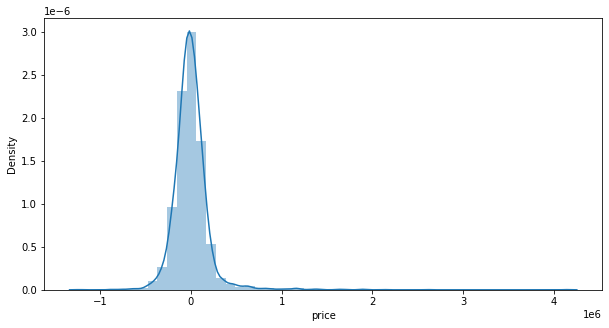

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

By visualizing the residual we can see that is normally distributed (proof of having linear relationship with the dependent variable)

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [20]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.tail(10)
df1

,Actual,Predicted
20257,1302000.0,1.045702e+06
19630,855169.0,7.195101e+05
4125,346500.0,4.312413e+05
13521,585000.0,6.631866e+05
13042,570000.0,7.612871e+05
7148,738000.0,5.492039e+05
2747,726000.0,7.331312e+05
15565,560000.0,7.422720e+05
21238,299000.0,2.304516e+05
2333,555000.0,8.778277e+05


In [21]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
#mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. 
#Examples of Y versus X include comparisons of predicted versus observed.
# explained_variance_score: variance of prediction errors and actual values - Best possible score is 1.0, lower values are worse

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 124670.69171396752
MSE: 41521046615.70101
VarScore: 0.7071228258774225


**Model 2- Neural Network**

In [22]:
hp_df = pd.read_csv("kc_house_data.csv")


# Review the DataFrame
hp_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
# Define features set X by selecting all columns but id, price, date,zipcode
X = hp_df.drop(columns=["id","price","date","lat","long"]).copy()

# Display the features DataFrame
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [24]:
# Define target set by selecting the price column
y = hp_df["price"]

# Display a sample of y
y[:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [25]:
# Create training and testing datasets using train_test_split
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Create the StandardScaler instance
X_scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

# Scale both the training and testing data from the features dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [26]:
# Define the model - deep neural net with two hidden layers
number_inputs = 16
# Define the number of hidden nodes for the model
number_hidden_nodes = 12

# Create the Sequential model instance
neuron = Sequential()

# Add a Dense layer specifying the number of inputs, the number of hidden nodes, and the activation function
neuron.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
neuron.add(Dense(1, activation="linear"))

In [27]:
# Display the Sequential model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the Sequential model
neuron.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [29]:
# Fit the model using 1000 epochs and the training data
model = neuron.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
507/507 [==============================] - 1s 1ms/step - loss: 415118327808.0000 - mse: 415118327808.0000
Epoch 2/1000
507/507 [==============================] - 1s 1ms/step - loss: 415081234432.0000 - mse: 415081234432.0000
Epoch 3/1000
507/507 [==============================] - 1s 1ms/step - loss: 415001214976.0000 - mse: 415001214976.0000
Epoch 4/1000
507/507 [==============================] - 1s 1ms/step - loss: 414877941760.0000 - mse: 414877941760.0000
Epoch 5/1000
507/507 [==============================] - 1s 1ms/step - loss: 414721376256.0000 - mse: 414721376256.0000
Epoch 6/1000
507/507 [==============================] - 1s 1ms/step - loss: 414536171520.0000 - mse: 414536171520.0000
Epoch 7/1000
507/507 [==============================] - 1s 1ms/step - loss: 414325047296.0000 - mse: 414325047296.0000
Epoch 8/1000
507/507 [==============================] - 1s 1ms/step - loss: 414090625024.0000 - mse: 414090625024.0000
Epoch 9/1000
507/507 [==========================

In [30]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

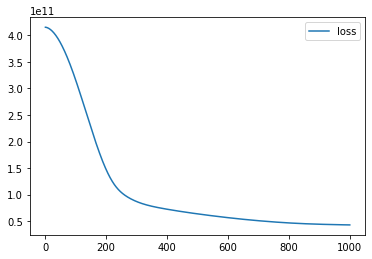

In [31]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

In [32]:
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_pred = neuron.predict(X_test_scaled)

In [34]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 141791.10


In [35]:
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Variance score is: 0.67


In [36]:
hp_df['price'].mean()

540088.1417665294

**Model 3- Gradiant Boosting**

In [37]:
# Import the  dataset into a Pandas Dataframe
House_DF = pd.read_csv("kc_house_data.csv")

In [38]:
#Drop unnecessary columns 
X = House_DF.drop(['id', 'price', 'date', 'zipcode'],axis=1)

In [39]:
#Declare y Variable
y = House_DF['price']

In [40]:
#Training and testing variables
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state = 40)
X_scaler = StandardScaler()
X_scaler.fit(x_train)
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)

In [42]:
from sklearn import ensemble

In [43]:
#Gradient Boosting Model
gbModel = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 20,
          learning_rate = 0.1, loss='ls')
gbModel.fit(X_train_scaled, y_train)
gbModel.score(X_test_scaled,y_test)

0.8644463371579796

In [44]:
#Calculate Mean Absolute Error
y_pred = gbModel.predict(X_test_scaled)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 79752.99217481511


**Comparing Mean of Absolute Errors in all three models:**


Multiple Regression: 124670.69

Neural Network with Karas: 125986.25

Gradiant Boost: 79752.99

## **The Gradiant Boost model provides the best predicting power.**